In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# Generate synthetic data
np. random.seed(0)
centers = [[-5,0],[0, 1.5]]
X, y = make_blobs(n_samples =1000,centers = centers,random_state =40)
transformation = [[0.4,0.2],[-0.4,1.2]]
X = np.dot(X,transformation)
# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape[0],1)), X]
# Initialize coefficients

# Define the logistic sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))
    
# Define the logistic loss ( binary cross - entropy ) function
def log_loss(y_true,y_pred):
    epsilon = np.exp(-15)
    y_pred = np.clip(y_pred,epsilon,1-epsilon) # Clip to avoid log(0)
    return -(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
    
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10

In [65]:
#number of data samples
N=X.shape[0]
#function to find batch gradient descent method and newton method
def grad(iterations,m):
    #store the loss values
    loss=0
    loss_history = []
    # matrix to store weights
    W=np.zeros(X.shape[1])
    
    for i in range(iterations):
        # Calcualting the predicted values
        z = np.dot(X, W)
        y_pred1 = sigmoid(z)
        # calculating the gradient of batch descent method
        gradient = np.dot(X.T, y - y_pred1)
        
        #diagonal entries for matrix S of Newton method
        s=(y_pred1-y)*(1-y_pred1-y)
        #diagonal matrix S
        S=np.diag(s)
        # storing the XTSX in matrix M
        M=np.dot(X.T,np.dot(S,X))
        #inverse of matrix M
        gradient_1= np.linalg.inv(M)
        # Update the weights using gradient descent
        if m==0:   # m=0 for batch gradient method
            W += learning_rate * gradient/N   #update the weight of gradient descent method
        else:     # m=1 for Newton method
            W +=  np.dot(gradient_1,gradient)   #update the weight of Newton method
    
        loss=np.mean(log_loss(y,y_pred1))
        loss_history.append(loss)  #store the loss values in the loss_history array 
    return loss_history

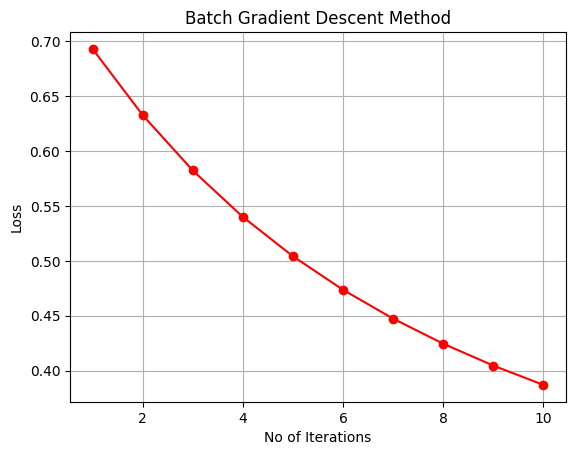

In [75]:
#plot the loss function with no of iterations
plt.plot(range(1,iterations+1), grad(iterations,0), marker = 'o',color='red')
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent Method')
plt.grid(True)
plt.show()

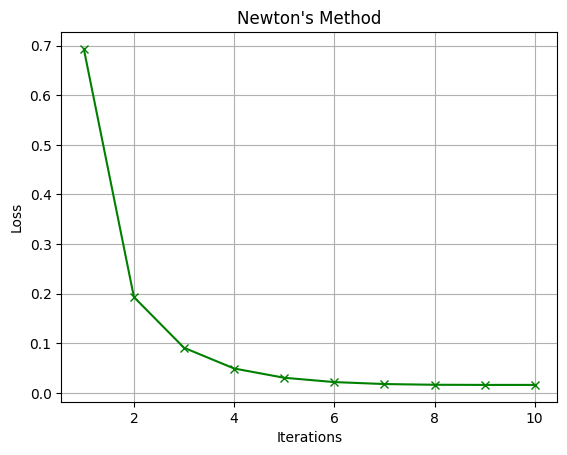

In [77]:
#plot the loss function with no of iterations for Newton's method
plt.plot(range(1,iterations+1), grad(iterations,1), marker = 'x',color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Newton\'s Method')
plt.grid(True)
plt.show()

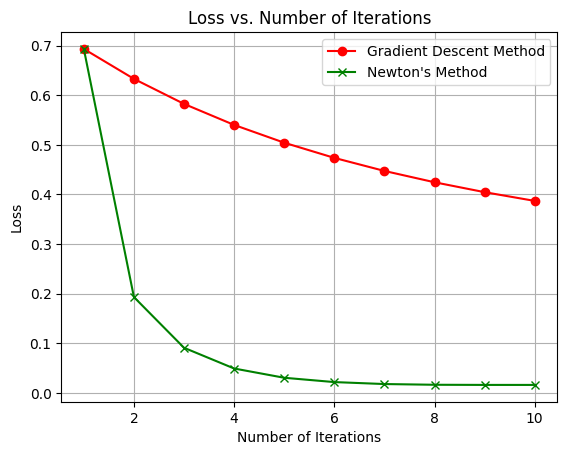

In [74]:
#plot the Loss for both the methods
plt.plot(range(1, iterations + 1),grad(iterations,0), label='Gradient Descent Method', marker='o',color='red')
plt.plot(range(1, iterations + 1),grad(iterations,1), label="Newton's Method", marker='x',color='green')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Number of Iterations')
plt.grid(True)
plt.show()